# ממ"ן 12

מגיש: נועם שדה

תאריך: 16.12.2022 

# חלק 1: MNIST

In [1]:
#import tensorflow as tf
#from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm
from sklearn import metrics
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import cv2 as cv
import gzip
import os
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### טעינת סט הנתונים:

In [2]:
with open('mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f,encoding='latin1')
x_train, y_train = train_set
x_test, y_test = test_set

### נציג כמה תמונות יש מכל ספרה:

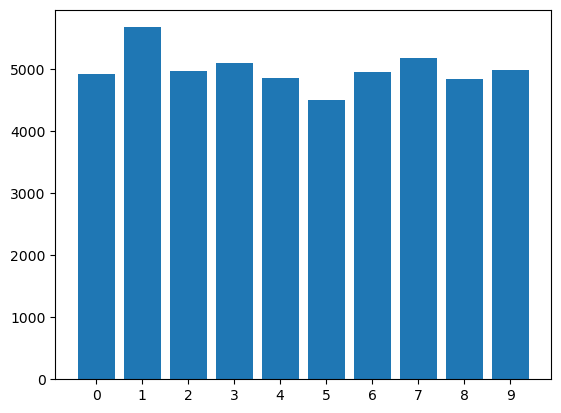

In [3]:
nums = list(range(0,10))
plt.xticks(nums)
plt.bar(nums,np.bincount(y_train))
plt.show()

In [4]:
for i, num in enumerate(np.bincount(y_train)):
    print(f'{i}: {num}')

0: 4932
1: 5678
2: 4968
3: 5101
4: 4859
5: 4506
6: 4951
7: 5175
8: 4842
9: 4988


### נציג את 12 התמונות הראשונות:

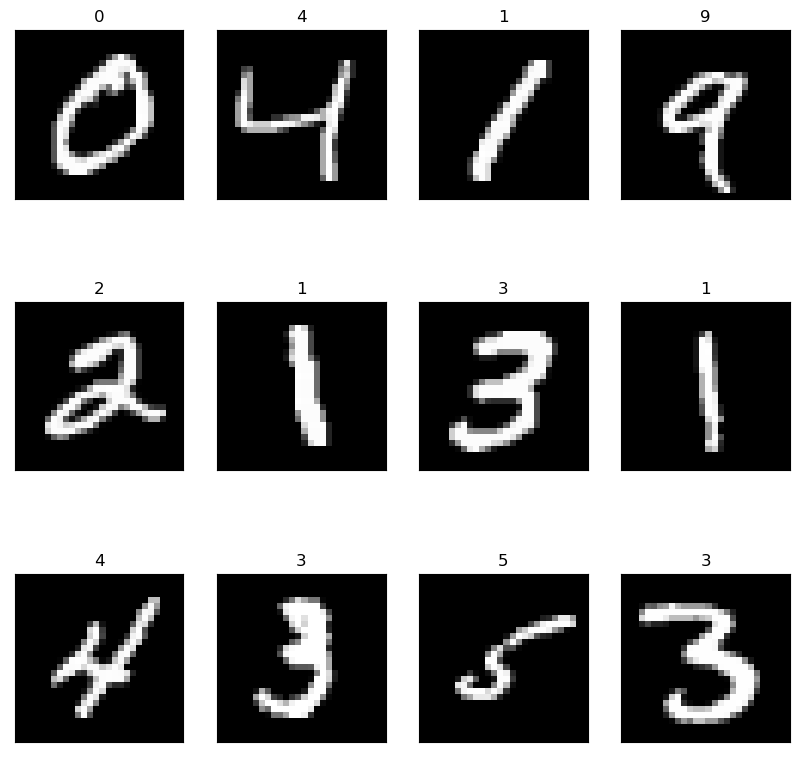

In [5]:
fig = plt.figure(figsize=(10, 10))
for i in range(12):
    i = i + 1
    im = x_train[i].reshape([28, 28])
    label = y_train[i]
    plt1 = fig.add_subplot(3, 4, i)
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(im, cmap='gray', interpolation='nearest')

# שאלה 1

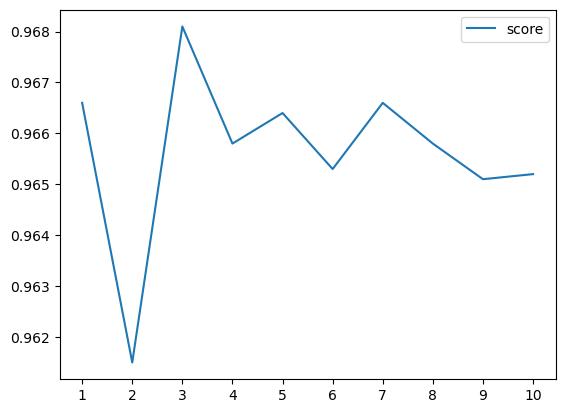

In [6]:
scores = []

for k in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors=k) 
    KNN.fit(x_train, y_train)
    scores.append(KNN.score(x_test, y_test))
    
plt.plot(scores, label='score')
plt.xticks(np.arange(len(scores)), np.arange(1, len(scores) + 1))
plt.legend()
plt.show()

# שאלה 2

### סעיף א':

6 principle components:

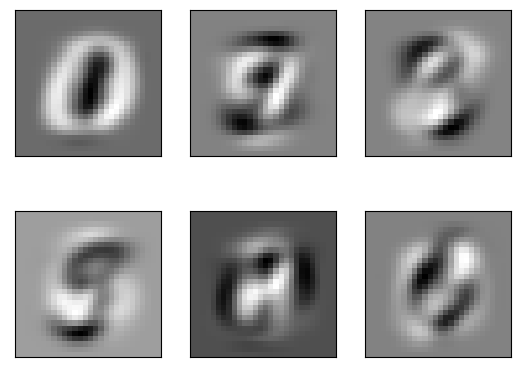

In [7]:
pca = PCA(random_state=20)
pca.fit(x_train)

pic = np.zeros([28, 28])
for i in range(6):
    p = pca.components_[i].reshape(28, 28)
    pic = pic + p
    plt.subplot(2,3,i+1), plt.imshow(p, cmap='gray', interpolation='nearest')
    plt.xticks([]), plt.yticks([])

plt.show()


הספרה הממוצעת:

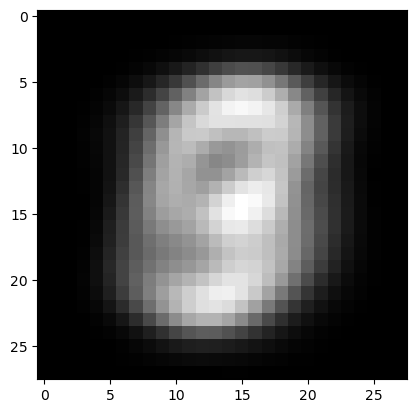

In [8]:
plt.imshow(pca.mean_.reshape([28, 28]), cmap='gray')  # the mean
plt.show()

### סעיף ב:

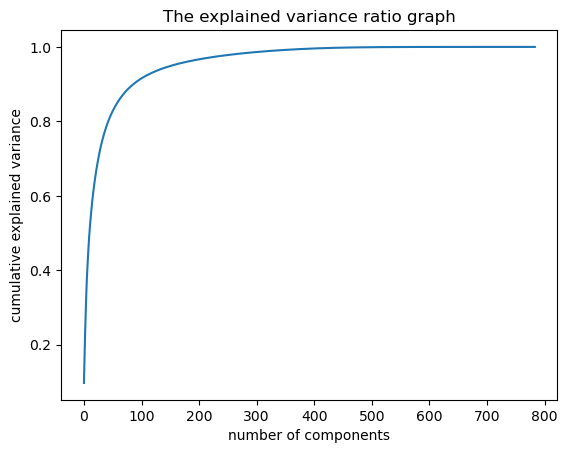

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("The explained variance ratio graph")
plt.show()

### סעיף ג:

In [10]:
sum=0
i=0
greater_than_80_flag=True
while True:
    sum = sum +pca.explained_variance_ratio_[i]
    if sum >=0.80 and greater_than_80_flag==True:
        print(f'after {i} components we got to 80% ')
        greater_than_80_flag=False
    if sum >= 0.95:
        print(f'after {i} components we got to 95% ')
        break
    i = i + 1


after 43 components we got to 80% 
after 153 components we got to 95% 


### סעיף ד:

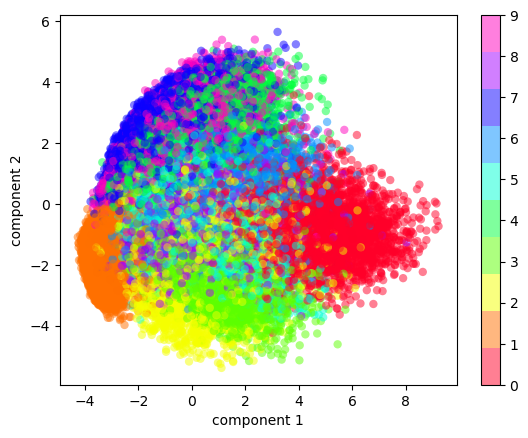

In [11]:
pca = PCA(n_components=2)
projected = pca.fit_transform(x_train)

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

### סעיף ה'

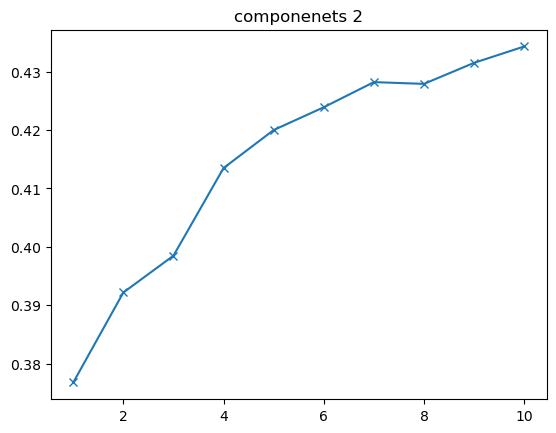

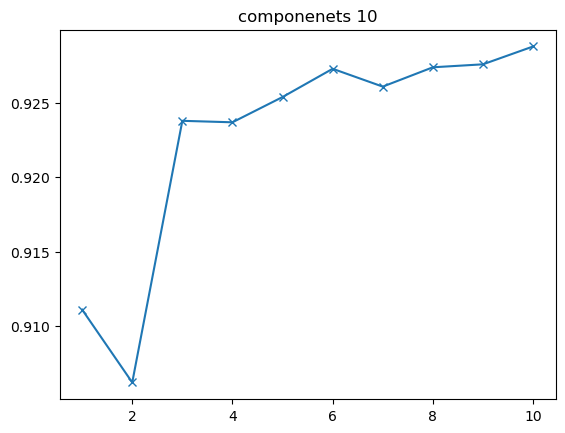

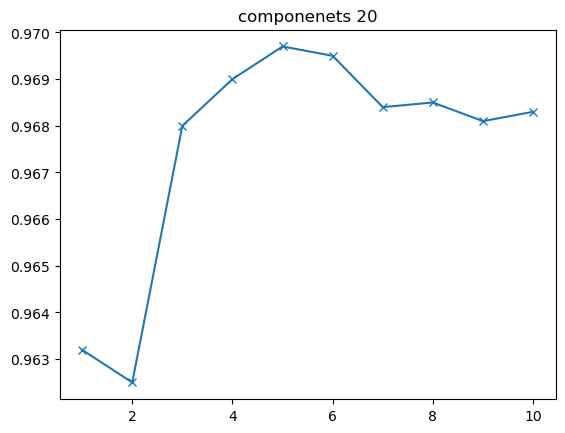

In [12]:
compoList = [2, 10, 20]

for comp in compoList:
    pcaForKNN = PCA(n_components=comp)
    pcaForKNN.fit(x_train)
    x_train_ready = pcaForKNN.transform(x_train)
    x_test_ready = pcaForKNN.transform(x_test)
    
    KNN_scores = []
    for k in range(1,11):
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(x_train_ready, y_train)
        KNN_scores.append(KNN.score(x_test_ready, y_test))

    plt.figure()
    plt.title(f'componenets {comp}')
    plt.plot(range(1, 11), KNN_scores, marker='x')

plt.show()

### סעיף ו':

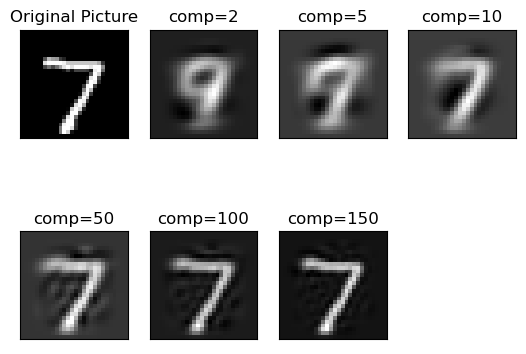

In [13]:
comp = [2, 5, 10, 50, 100, 150]
plt.subplot(2,4,1), plt.imshow(x_test[0].reshape([28, 28]), cmap='gray')
plt.title('Original Picture'),plt.xticks([]), plt.yticks([])

for i in range(len(comp)):
    pca = PCA(n_components=comp[i])
    pca.fit(x_train, y_train)
    test_tran = pca.transform(x_test[0].reshape(1, -1))
    inverse_trans = pca.inverse_transform(test_tran).reshape([28, 28])
    plt.subplot(2,4,i+2), plt.imshow(inverse_trans, cmap='gray', interpolation='nearest')
    plt.title(f"comp={comp[i]}"), plt.xticks([]), plt.yticks([])
plt.show()

### סעיף ז':

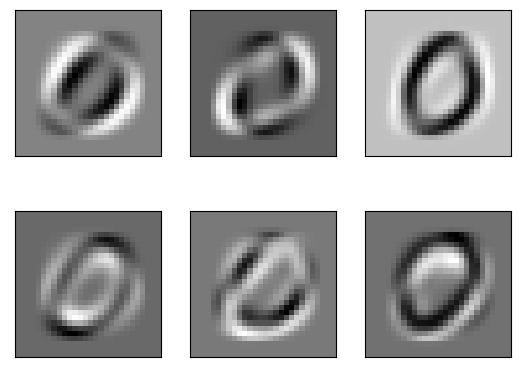

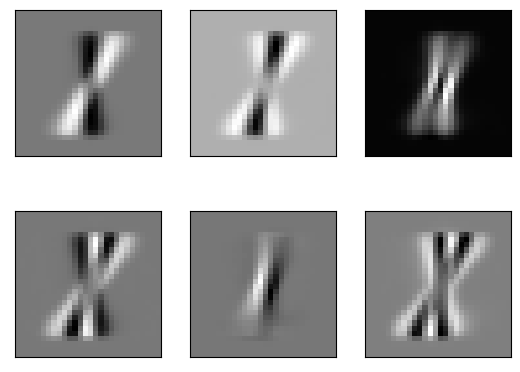

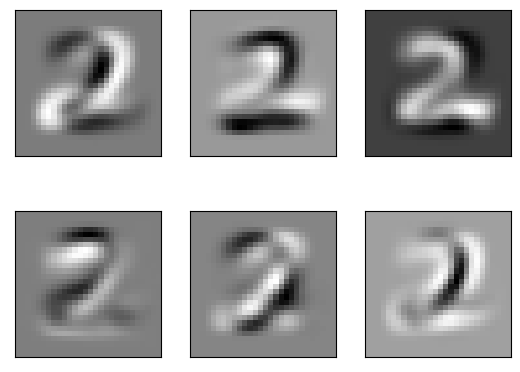

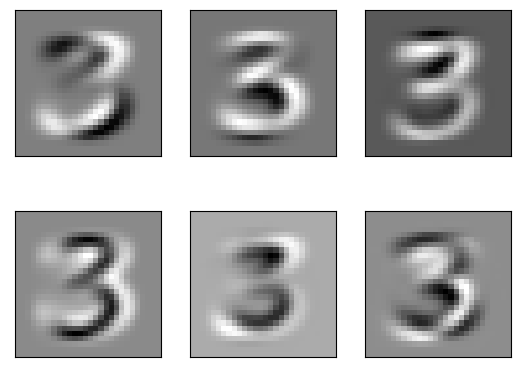

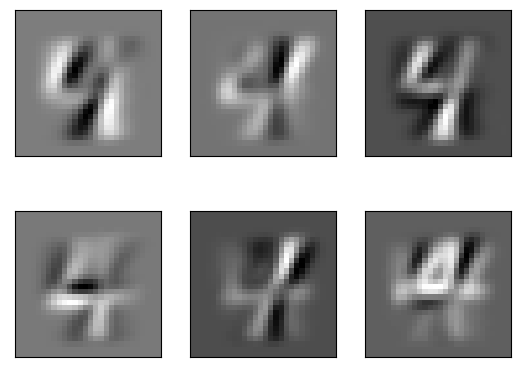

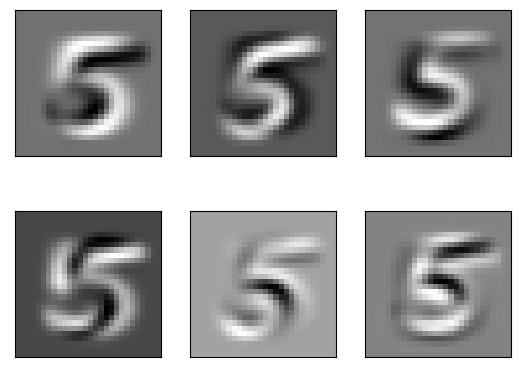

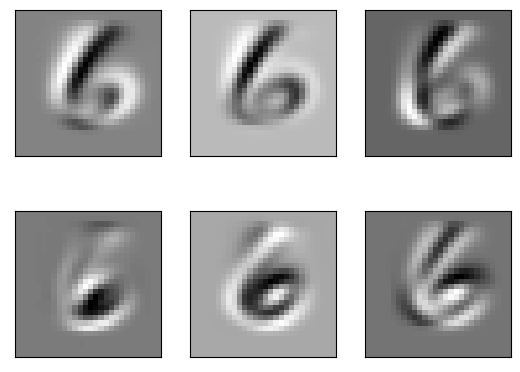

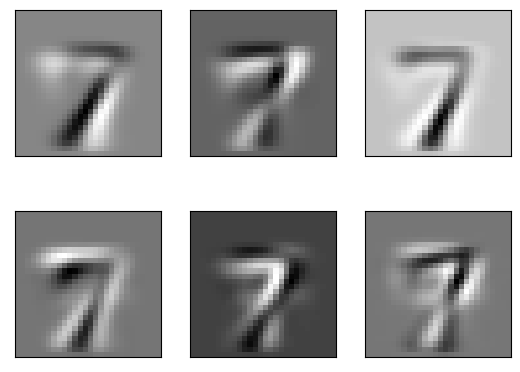

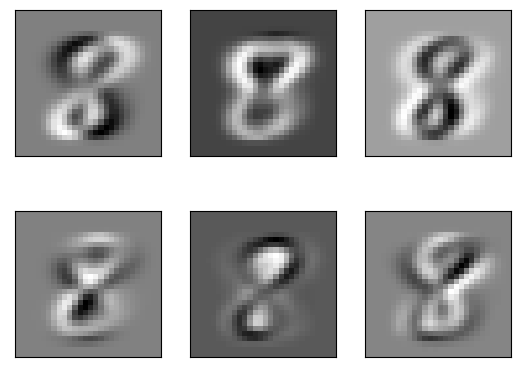

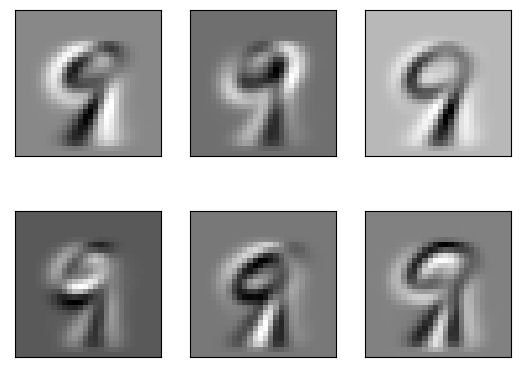

In [14]:
digits = []
digits_pca = []
for i in range (10):
    x_train_num = []
    for j in range (len(x_train)):
        if y_train[j] == i:
            x_train_num.append(x_train[j])

    pca = PCA(n_components=150)
    pca.fit(x_train_num)
    digits_pca.append(pca)

    pic = np.zeros([28, 28])
    for j in range(6):
        p = pca.components_[j].reshape(28, 28)
        pic = pic + p
        plt.subplot(2,3,j+1), plt.imshow(p, cmap='gray', interpolation='nearest')
        plt.xticks([]), plt.yticks([])

    plt.show()

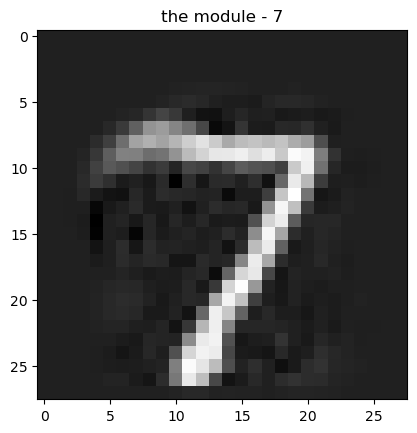

0.9146


In [15]:
#calculates mistakes
inverse_image_module = []
#test
for j in range(len(x_test)):
    score = []
    #transform and inverse
    for i in range(10):
        test_tran = digits_pca[i].transform(x_test[j].reshape(1, -1))
        inverse_trans = digits_pca[i].inverse_transform(test_tran).reshape([28,28])
        #Euclidean distance
        score.append(np.linalg.norm(x_test[j] - inverse_trans.ravel()))


    # get the module
    theModule = score.index(min(score))
    inverse_image_module.append(theModule)

    #For a model of a single image review
    if j == 0:
        plt.figure()
        plt.imshow(inverse_trans, cmap='gray', interpolation='nearest')
        plt.title(f"the module - {theModule}")
        plt.show()

#calculate error:
success = 0
for i in range(len(x_test)):
    if inverse_image_module[i] == y_test[i]:
        success += 1
print (success / len(x_test))

# חלק 2 - סיווג ע"י BOW

## שלב האימון

### טעינת התמונות וחילוק ל- 80% אימון ו- 20% בדיקה

In [16]:
category1 = 'coast'
category2 = 'forest'

files = os.listdir("images/")
category1_set = []
category2_set = []
for file in files:
    category = file.split('_')[0]
    if category == category1:
        category1_set.append(file)
    if category == category2:
        category2_set.append(file)
x_train=[]
y_train=[]
x_test=[]
y_test=[]

ratio= int(0.8 * len(category1_set))
for i in range(len(category1_set)):
    if i < ratio:
        x_train.append(category1_set[i])
        y_train.append(category1)
    else:
        x_test.append(category1_set[i])
        y_test.append(category1)

ratio= int(0.8 * len(category2_set))
for i in range(len(category2_set)):
    if i < ratio:
        x_train.append(category2_set[i])
        y_train.append(category2)
    else:
        x_test.append(category2_set[i])
        y_test.append(category2)

### 1. חישוב מאפייני dense-SIFT מכל התמונות

In [17]:
k=150
bins=100 
mbk=MiniBatchKMeans(k)
sift = cv.SIFT_create()

### 2. Vector Quantization 

In [18]:
POI=[]
for img in x_train:
    img=cv.imread(os.path.join('images', img), 0) 
    _, des = sift.detectAndCompute(img,None)
    POI.append(des)
    mbk.partial_fit(des)

### 3. חישוב היסטוגרמה של מספר המאפיינים השייכים ל- cluster ה-k

In [19]:
hist=[]
for des in POI:
    pred=mbk.predict(des)
    his,_=np.histogram(pred,bins=bins)
    hist.append(his)

### 4. אימון מסוג SVM 
### ושלב הבדיקה

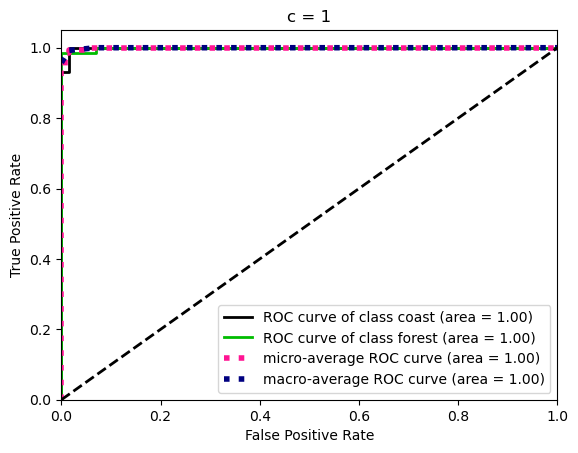

 Class report for classifier SVC(C=1, kernel='linear', max_iter=5000, probability=True, random_state=20),
              precision    recall  f1-score   support

       coast       0.99      0.99      0.99        72
      forest       0.98      0.98      0.98        66

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Confusion matrix:
[[71  1]
 [ 1 65]]


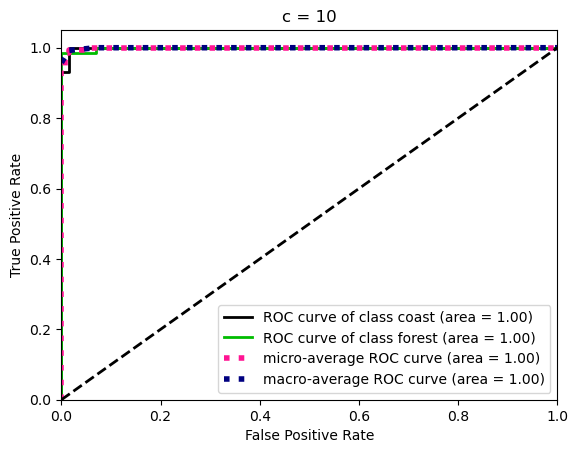

 Class report for classifier SVC(C=10, kernel='linear', max_iter=5000, probability=True, random_state=20),
              precision    recall  f1-score   support

       coast       0.99      0.99      0.99        72
      forest       0.98      0.98      0.98        66

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Confusion matrix:
[[71  1]
 [ 1 65]]


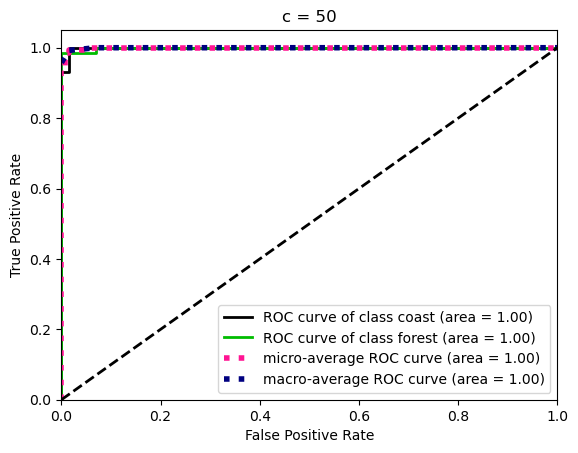

 Class report for classifier SVC(C=50, kernel='linear', max_iter=5000, probability=True, random_state=20),
              precision    recall  f1-score   support

       coast       0.99      0.99      0.99        72
      forest       0.98      0.98      0.98        66

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Confusion matrix:
[[71  1]
 [ 1 65]]


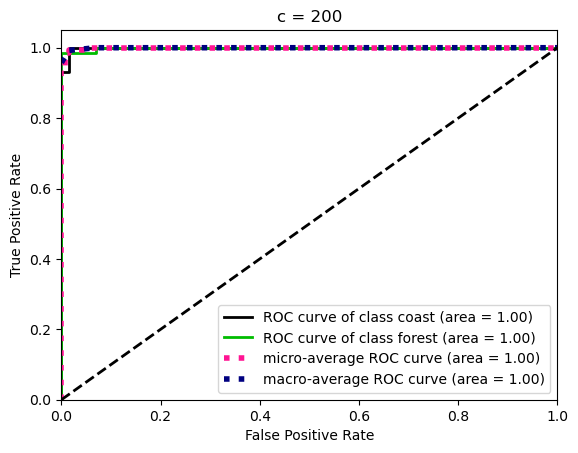

 Class report for classifier SVC(C=200, kernel='linear', max_iter=5000, probability=True, random_state=20),
              precision    recall  f1-score   support

       coast       0.99      0.99      0.99        72
      forest       0.98      0.98      0.98        66

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Confusion matrix:
[[71  1]
 [ 1 65]]


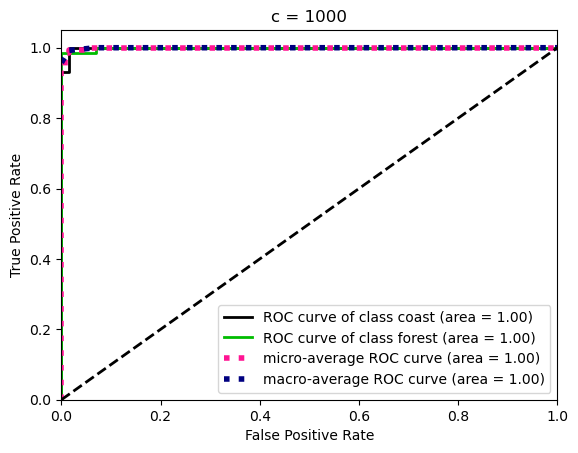

 Class report for classifier SVC(C=1000, kernel='linear', max_iter=5000, probability=True, random_state=20),
              precision    recall  f1-score   support

       coast       0.99      0.99      0.99        72
      forest       0.98      0.98      0.98        66

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

Confusion matrix:
[[71  1]
 [ 1 65]]


In [20]:
c_array=[1,10,50,200,1000]
for c in c_array: #trying out diffrent values for C
    # SVM
    linear_svm=svm.SVC(C=c,max_iter=5000,random_state=20,probability=True,kernel='linear') #Model that supports ROC Plot
    linear_svm.fit(hist,y_train)
    
    # test
    POI_test = []
    for pic in x_test:
        img = cv.imread(os.path.join('images', pic), 0)
        _,des = sift.detectAndCompute(img,None)

        POI_test.append(des)
    # histograms test
    hist_test = []
    for des in POI_test:
        pred = mbk.predict(des)
        his, _ = np.histogram(pred, bins=bins)
        hist_test.append(his)
    
    predictions = linear_svm.predict(hist_test)
    predictionsProb = linear_svm.predict_proba(hist_test)
    
    # Compute ROC curve and ROC area for each class
    skplt.metrics.plot_roc(y_test, predictionsProb)
    plt.title(f'c = {c}')
    plt.show()
    
    print(f" Class report for classifier {linear_svm},\n{metrics.classification_report(y_test, predictions)}")
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))